In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

In [58]:
df = pd.read_csv('/content/nyc-rolling-sales.csv.zip')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Step 1: Explore data types, handle missing data, duplicates, blanks, outliers, datetime var

# ***Explore data types***

In [59]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [61]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [62]:
# prompt: drop address column

df.drop('ADDRESS', axis=1, inplace=True)


In [63]:
df["NEIGHBORHOOD"].value_counts()

,count
NEIGHBORHOOD,
FLUSHING-NORTH,3068
UPPER EAST SIDE (59-79),1736
UPPER EAST SIDE (79-96),1590
UPPER WEST SIDE (59-79),1439
BEDFORD STUYVESANT,1436
...,...
FRESH KILLS,2
BRONX PARK,1
PELHAM BAY,1


In [64]:
df.nunique()

,0
BOROUGH,5
NEIGHBORHOOD,254
BUILDING CLASS CATEGORY,47
TAX CLASS AT PRESENT,11
BLOCK,11566
LOT,2627
EASE-MENT,1
BUILDING CLASS AT PRESENT,167
APARTMENT NUMBER,3989
ZIP CODE,186


Variable types

1. BOROUGH: Digit code for the borough (1 = Manhattan, 2 = Bronx, etc.). Categorical.
2. NEIGHBORHOOD: Name of the neighborhood determined by assessors. Categorical.
3. BUILDING CLASS CATEGORY: Broad usage category for properties (e.g., One Family Homes). Categorical.
4. TAX CLASS AT PRESENT: Property's tax class (1 to 4). Categorical.
5. BLOCK: Sub-division of borough for property identification. Numeric.
6. LOT: Sub-division of a block for unique property identification. Numeric.
7. BUILDING CLASS AT PRESENT: Classification describing the property's use (e.g., "A" for one-family homes). Categorical.
8. ADDRESS: Street address (not extracted). Not used. Address has too many unique, non impactfull values and will not be useful for EDA.
9. ZIP CODE: Property's postal code. Categorical.
10. RESIDENTIAL UNITS: Number of residential units. Numeric.
11. COMMERCIAL UNITS: Number of commercial units. Numeric.
12. TOTAL UNITS: Total number of units. Numeric.
13. LAND SQUARE FEET: Land area in square feet. Numeric.
14. GROSS SQUARE FEET: Total building area, including land. Numeric.
15. YEAR BUILT: Year the structure was built. Categorical.
16. TAX CLASS AT TIME OF SALE: Property's tax class at the time of sale. Categorical.
17. BUILDING CLASS AT TIME OF SALE: Building classification at the time of sale. Categorical.
18. SALE PRICE: The sale price of the property. Numeric.
19. SALE DATE: Date of the property sale. DateTime (Year/Month as Categorical).
20. EASEMENT: Right to limited use of another's property. Categorical (if applicable).

In [65]:
categorical = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "ZIP CODE", "BUILDING CLASS AT PRESENT", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE"]
numerical = ["BLOCK", "LOT", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [67]:
for col in categorical:
    try:
        df[col] = df[col].astype("category")
    except ValueError:
        df[col] = pd.to_category(df[col], errors='coerce')

In [68]:
for col in numerical:
    try:
        df[col] = df[col].astype("int")
    except ValueError:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [69]:
df.isnull().sum()/len(df)

,0
BOROUGH,0.000000
NEIGHBORHOOD,0.000000
BUILDING CLASS CATEGORY,0.000000
TAX CLASS AT PRESENT,0.000000
BLOCK,0.000000
LOT,0.000000
EASE-MENT,0.000000
BUILDING CLASS AT PRESENT,0.000000
APARTMENT NUMBER,0.000000
ZIP CODE,0.000000


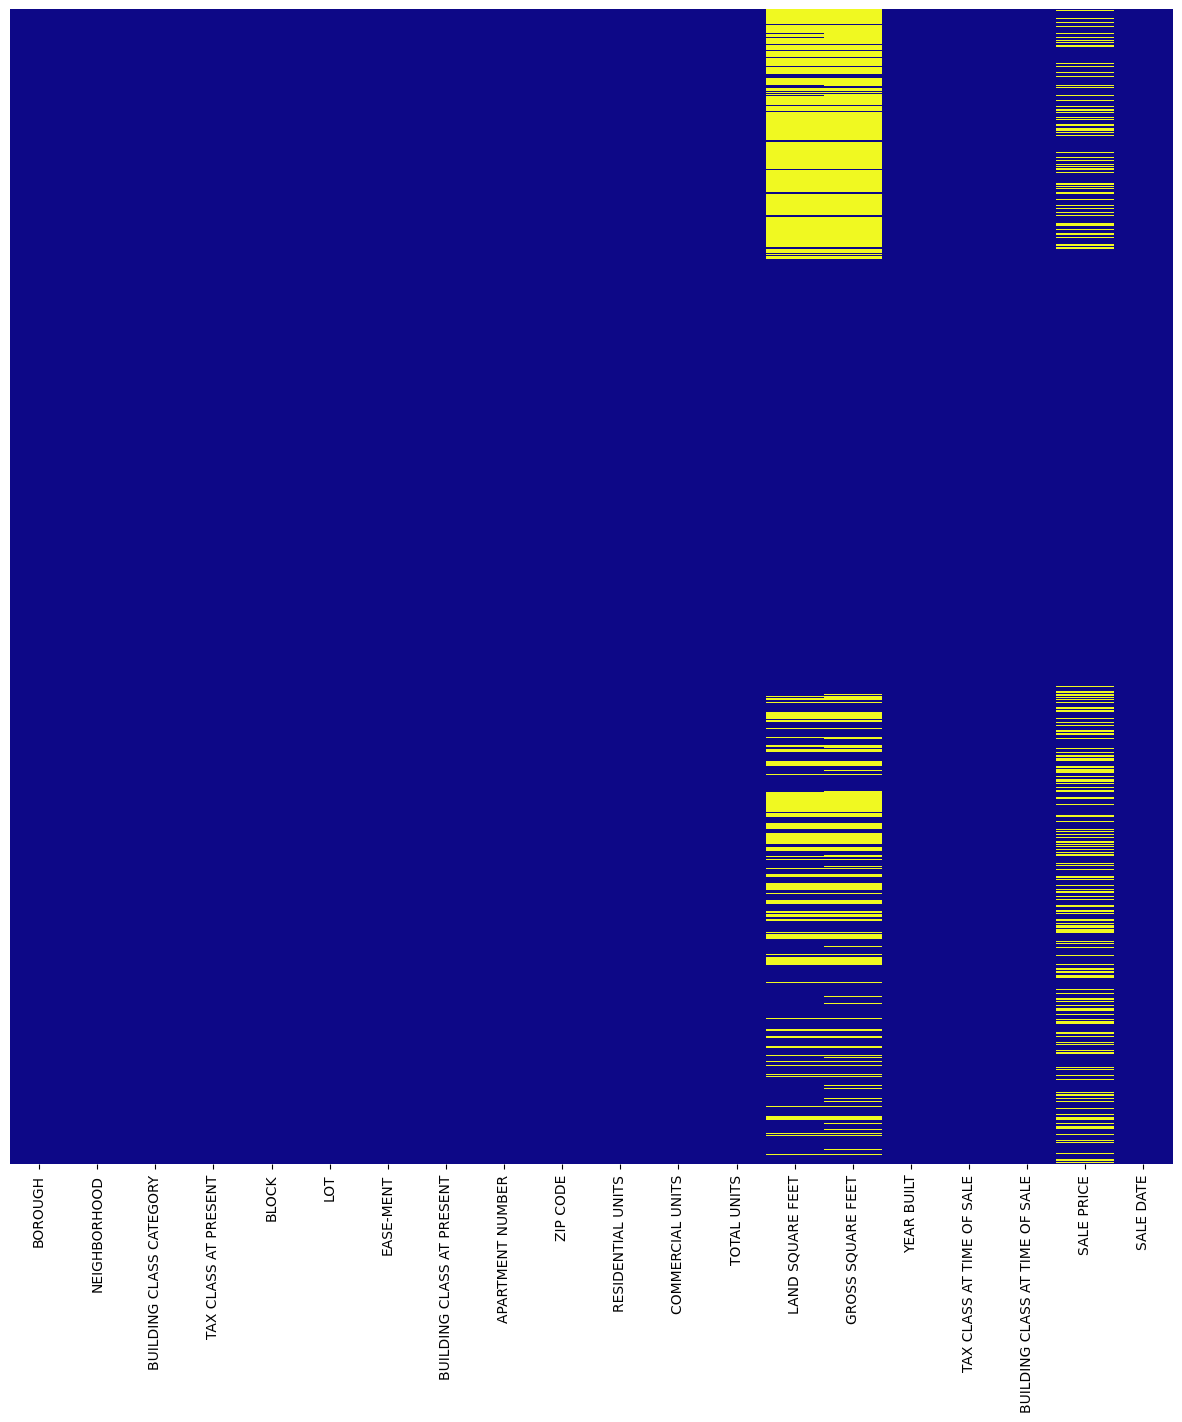

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap="plasma")
plt.show()

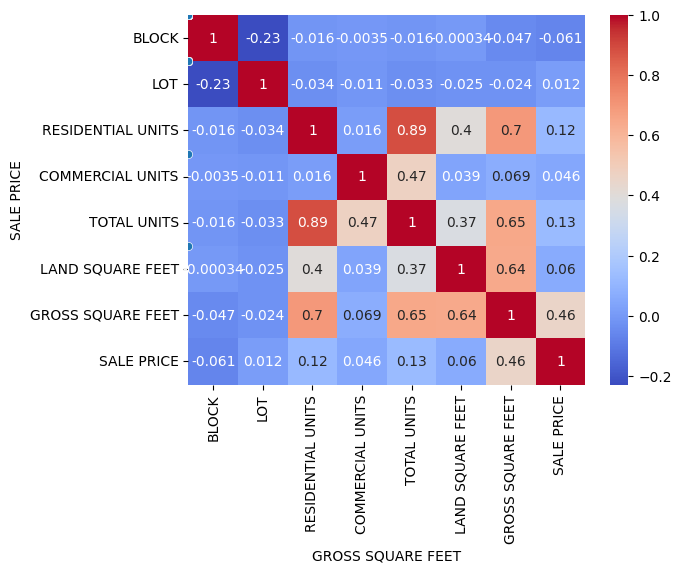

In [71]:
# Correlation heatmap
# Remove non-numeric columns before calculating correlation.
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

# Scatterplot to see relationship between sale price and gross square feet
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df)
plt.show()

In [72]:
df["TAX CLASS AT PRESENT"]

,TAX CLASS AT PRESENT
0,2A
1,2
2,2
3,2B
4,2A
...,...
84543,1
84544,1
84545,1
84546,4


In [73]:
# prompt: use a string match for numbers 1-4 to define these values for tax class present. THis should capture the cell as long as any of those numbers are present regardless if it is surronded by other characters. Class 1: Small Residential and Mixed-Use Properties
# Class 2: Larger Residential Properties (e.g., Cooperatives and Condominiums)
# Class 3: Utility Company Properties
# Class 4: Commercial and Indust

import re

def categorize_tax_class(tax_class):
  """Categorizes tax class based on string matching."""
  if re.search(r"1", str(tax_class)):
    return "Class 1: Small Residential and Mixed-Use Properties"
  elif re.search(r"2", str(tax_class)):
    return "Class 2: Larger Residential Properties (e.g., Cooperatives and Condominiums)"
  elif re.search(r"3", str(tax_class)):
    return "Class 3: Utility Company Properties"
  elif re.search(r"4", str(tax_class)):
    return "Class 4: Commercial and Indust"
  else:
    return "Unknown"

df["TAX CLASS AT PRESENT_Categorized"] = df["TAX CLASS AT PRESENT"].apply(categorize_tax_class)


In [75]:
df["TAX CLASS AT PRESENT_Categorized"]

,TAX CLASS AT PRESENT_Categorized
0,"Class 2: Larger Residential Properties (e.g., ..."
1,"Class 2: Larger Residential Properties (e.g., ..."
2,"Class 2: Larger Residential Properties (e.g., ..."
3,"Class 2: Larger Residential Properties (e.g., ..."
4,"Class 2: Larger Residential Properties (e.g., ..."
...,...
84543,Class 1: Small Residential and Mixed-Use Prope...
84544,Class 1: Small Residential and Mixed-Use Prope...
84545,Class 1: Small Residential and Mixed-Use Prope...
84546,Class 4: Commercial and Indust


# **Missing data**

In [24]:
df["GROSS SQUARE FEET"].describe()

,GROSS SQUARE FEET
count,5.693600e+04
mean,4.045707e+03
std,3.503249e+04
min,0.000000e+00
25%,1.046750e+03
50%,1.680000e+03
75%,2.560000e+03
max,3.750565e+06


I identified the key variables most strongly correlated with gross and land square footage using a heatmap of feature correlations. For missing values in these variables, I imputed the median values from the most influential features to maintain consistency and minimize data bias.

In [11]:
df['GROSS SQUARE FEET'] = df.groupby(['LAND SQUARE FEET', 'TOTAL UNITS', 'RESIDENTIAL UNITS'])['GROSS SQUARE FEET'].transform(
    lambda x: x.fillna(x.median()) if not x.median() == np.nan and len(x.dropna()) > 0 else x.fillna(df['GROSS SQUARE FEET'].median())
)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [26]:
df["GROSS SQUARE FEET"].describe()

,GROSS SQUARE FEET
count,5.829600e+04
mean,3.978144e+03
std,3.462334e+04
min,0.000000e+00
25%,1.040000e+03
50%,1.680000e+03
75%,2.530000e+03
max,3.750565e+06


In [27]:
df["LAND SQUARE FEET"].describe()

,LAND SQUARE FEET
count,5.829600e+04
mean,3.941676e+03
std,4.198397e+04
min,0.000000e+00
25%,1.650000e+03
50%,2.325000e+03
75%,3.500000e+03
max,4.252327e+06


In [12]:
df['LAND SQUARE FEET'] = df.groupby(['GROSS SQUARE FEET', 'TOTAL UNITS', 'RESIDENTIAL UNITS'])['LAND SQUARE FEET'].transform(
    lambda x: x.fillna(x.median()) if not x.median() == np.nan and len(x.dropna()) > 0 else x.fillna(df['LAND SQUARE FEET'].median())
)

In [29]:
df["LAND SQUARE FEET"].describe()

,LAND SQUARE FEET
count,5.829600e+04
mean,3.941676e+03
std,4.198397e+04
min,0.000000e+00
25%,1.650000e+03
50%,2.325000e+03
75%,3.500000e+03
max,4.252327e+06


Approach I used for "LAND SQUARE FEET" and "GROSS SQUARE FEET" did not work for "SALE PRICE", so I will leave it for now.

In [30]:
df["SALE PRICE"].describe()

,SALE PRICE
count,6.998700e+04
mean,1.276456e+06
std,1.140526e+07
min,0.000000e+00
25%,2.250000e+05
50%,5.300000e+05
75%,9.500000e+05
max,2.210000e+09


In [31]:
#df['SALE PRICE'] = df.groupby(['GROSS SQUARE FEET', 'TOTAL UNITS', 'RESIDENTIAL UNITS'])['SALE PRICE'].transform(lambda x: x.fillna(x.median()))

In [32]:
df["SALE PRICE"].describe()


,SALE PRICE
count,6.998700e+04
mean,1.276456e+06
std,1.140526e+07
min,0.000000e+00
25%,2.250000e+05
50%,5.300000e+05
75%,9.500000e+05
max,2.210000e+09


# **Outliers**

In [26]:
# prompt: write a line of code to see the mean and median of each numerical column

df.describe().T


,count,mean,std,min,25%,50%,75%,max
BLOCK,84548.0,4.237219e+03,3.568263e+03,1.0,1322.75,3311.0,6281.0,1.632200e+04
LOT,84548.0,3.762240e+02,6.581368e+02,1.0,22.00,50.0,1001.0,9.106000e+03
RESIDENTIAL UNITS,84548.0,2.025264e+00,1.672104e+01,0.0,0.00,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,84548.0,1.935587e-01,8.713183e+00,0.0,0.00,0.0,0.0,2.261000e+03
TOTAL UNITS,84548.0,2.249184e+00,1.897258e+01,0.0,1.00,1.0,2.0,2.261000e+03
LAND SQUARE FEET,58296.0,3.941676e+03,4.198397e+04,0.0,1650.00,2325.0,3500.0,4.252327e+06
GROSS SQUARE FEET,58296.0,3.978144e+03,3.462334e+04,0.0,1040.00,1680.0,2530.0,3.750565e+06
SALE PRICE,69987.0,1.276456e+06,1.140526e+07,0.0,225000.00,530000.0,950000.0,2.210000e+09


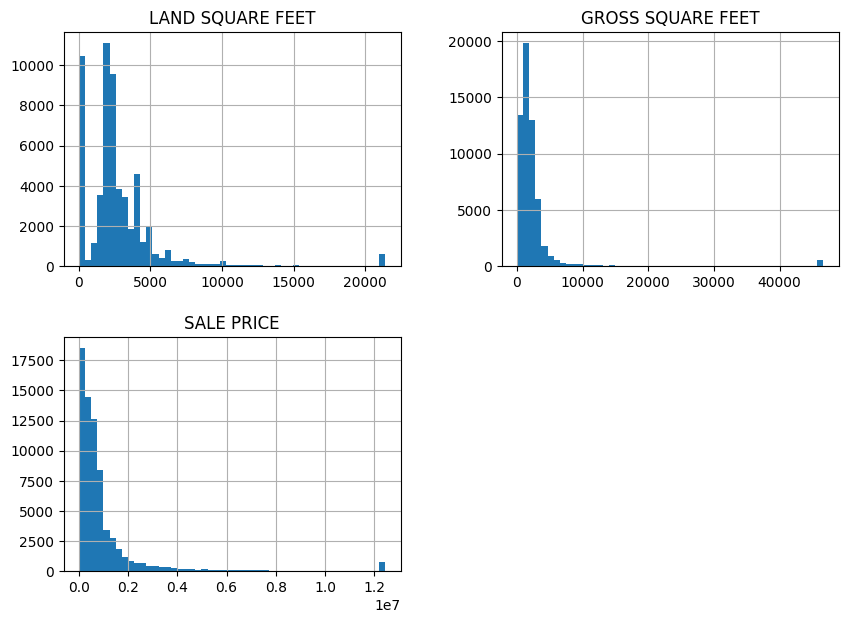

In [27]:
# Cap values at the 99th percentile for each numeric variable
capped_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in capped_columns:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Plot the histograms after capping the outliers
df[capped_columns].hist(figsize=(10, 7), bins=50)
plt.show()

In [28]:
# prompt: count sales price less than 10,000 or greater than 8000000

# Count sales price less than 10,000 or greater than 8000000
count_outliers = len(df[(df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 8000000)])
print(f"Count of sales price less than 10,000 or greater than 8000000: {count_outliers}")


Count of sales price less than 10,000 or greater than 8000000: 12778


In [29]:
# prompt: drop sale price if less than 10000 or more than 8000000

# Drop rows where 'SALE PRICE' is less than 10000 or greater than 8000000
df = df[(df['SALE PRICE'] >= 10000) & (df['SALE PRICE'] <= 8000000)]


In [30]:
# prompt: find the count of rows with a land square feet over 16,000 or are equal to 0

count_rows = df[(df['LAND SQUARE FEET'] > 16000) | (df['LAND SQUARE FEET'] == 0)]['LAND SQUARE FEET'].count()
print(f"Count of rows with land square feet over 16,000 or equal to 0: {count_rows}")

count_rows = df[(df['GROSS SQUARE FEET'] > 16000) | (df['GROSS SQUARE FEET'] == 0)]['GROSS SQUARE FEET'].count()
print(f"Count of rows with land square feet over 16,000 or equal to 0: {count_rows}")


Count of rows with land square feet over 16,000 or equal to 0: 8265
Count of rows with land square feet over 16,000 or equal to 0: 8950


In [31]:
# prompt: drop land square feet over 16000 or equal to o

# Drop rows where 'LAND SQUARE FEET' is over 16000 or equal to 0
df = df[(df['LAND SQUARE FEET'] <= 16000) & (df['LAND SQUARE FEET'] > 0)]
df = df[(df['GROSS SQUARE FEET'] <= 16000) & (df['GROSS SQUARE FEET'] > 0)]


In [32]:
df["LAND SQUARE FEET"].describe()
df["GROSS SQUARE FEET"].describe()
df["SALE PRICE"].describe()


,SALE PRICE
count,2.764600e+04
mean,8.415000e+05
std,8.507193e+05
min,1.000000e+04
25%,4.300000e+05
50%,6.200000e+05
75%,9.200000e+05
max,8.000000e+06


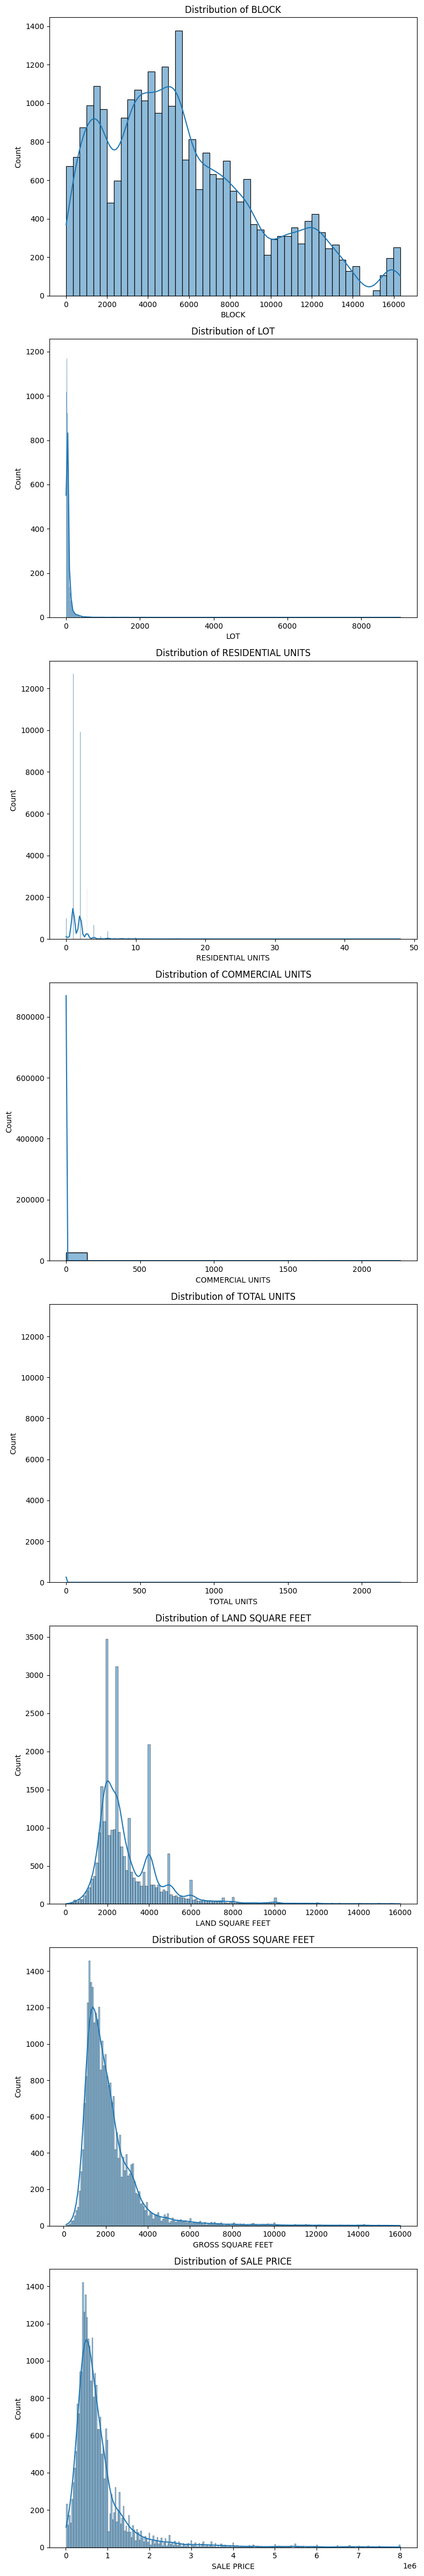

In [33]:
# prompt: generate a distribution chart for every numeric column

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, 6 * len(numeric_cols)))

# Plot distribution for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# ***Nulls, duplicates, blanks***

In [34]:
# prompt: drop duplicates

# Drop duplicates
df.drop_duplicates(inplace=True)


In [35]:
# prompt: change the sale date var to a date time category type with year and months

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE DATE'] = df['SALE DATE'].dt.to_period('M')

In [99]:
df["SALE DATE"].dtype

period[M]

In [36]:
# prompt: drop nulls

# Drop rows with null values in any column
df.dropna(inplace=True)


In [37]:
# prompt: view blank cells per columns

df.isnull().sum()


,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,0
BLOCK,0
LOT,0
EASE-MENT,0
BUILDING CLASS AT PRESENT,0
ADDRESS,0
APARTMENT NUMBER,0


# Step 2: Exploring variable relationships

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,27589.0,5686.716336,3781.036825,5.0,2870.0,5030.0,7940.0,16319.0
LOT,27589.0,62.128276,126.153864,1.0,20.0,39.0,65.0,9056.0
RESIDENTIAL UNITS,27589.0,1.837943,1.751348,0.0,1.0,2.0,2.0,48.0
COMMERCIAL UNITS,27589.0,0.185436,13.621189,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,27589.0,2.021965,13.722023,0.0,1.0,2.0,2.0,2261.0
LAND SQUARE FEET,27589.0,3037.257023,1749.787115,33.0,2000.0,2500.0,3800.0,16000.0
GROSS SQUARE FEET,27589.0,2186.958915,1469.540078,120.0,1350.0,1806.0,2507.0,16000.0
SALE PRICE,27589.0,842220.577513,851261.513470,10000.0,430000.0,620000.0,920000.0,8000000.0


In [78]:
# prompt:  assign these name values "Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5)" for BOROUGHs with their corresponding number.

# Create a dictionary to map borough numbers to names
borough_mapping = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}

# Use the map function to assign names based on the borough number
df['BOROUGH'] = df['BOROUGH'].map(borough_mapping)


In [40]:
# prompt: Assign these name values Class 1: Small Residential and Mixed-Use Properties
# Class 2: Larger Residential Properties (e.g., Cooperatives and Condominiums)
# Class 3: Utility Company Properties
# Class 4: Commercial and Industrial Properties for the corresponding numbers?

# Create a dictionary to map tax class numbers to names
tax_class_mapping = {
    1: "Class 1: Small Residential and Mixed-Use Properties",
    2: "Class 2: Larger Residential Properties (e.g., Cooperatives and Condominiums)",
    3: "Class 3: Utility Company Properties",
    4: "Class 4: Commercial and Industrial Properties"
}

# Use the map function to assign names based on the tax class number
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].map(tax_class_mapping)


,TAX CLASS AT PRESENT
0,NaN
3,NaN
4,NaN
6,NaN
172,NaN


# Step 3: Basic EDA

<ipython-input-51-6bcef1c37305>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sale_price_by_borough = df.groupby('BOROUGH')['SALE PRICE'].median()


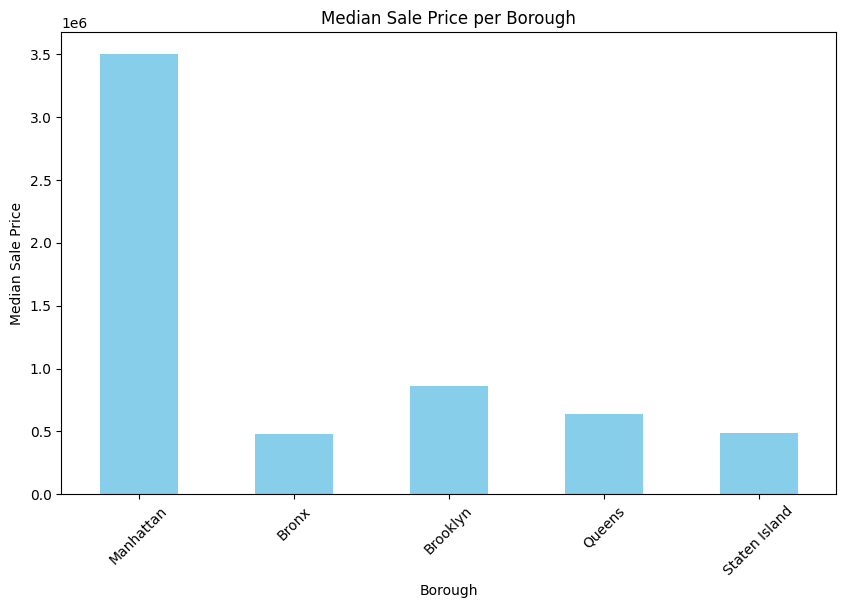

In [51]:
# prompt: Write a script that will take the median of sale price per borough and output the results in a bar chart.

# Calculate the median sale price per borough
median_sale_price_by_borough = df.groupby('BOROUGH')['SALE PRICE'].median()

# Create a bar chart
plt.figure(figsize=(10, 6))
median_sale_price_by_borough.plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price per Borough')
plt.xticks(rotation=45)
plt.show()


This first visual reveals the highest median sale price per property by BOROUGH. Manhatten is far ahead of the others by quite a bit.

<ipython-input-79-b2b2427b75e3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tax_class_counts = df.groupby(['BOROUGH', 'TAX CLASS AT PRESENT_Categorized'])['TAX CLASS AT PRESENT_Categorized'].count().unstack()


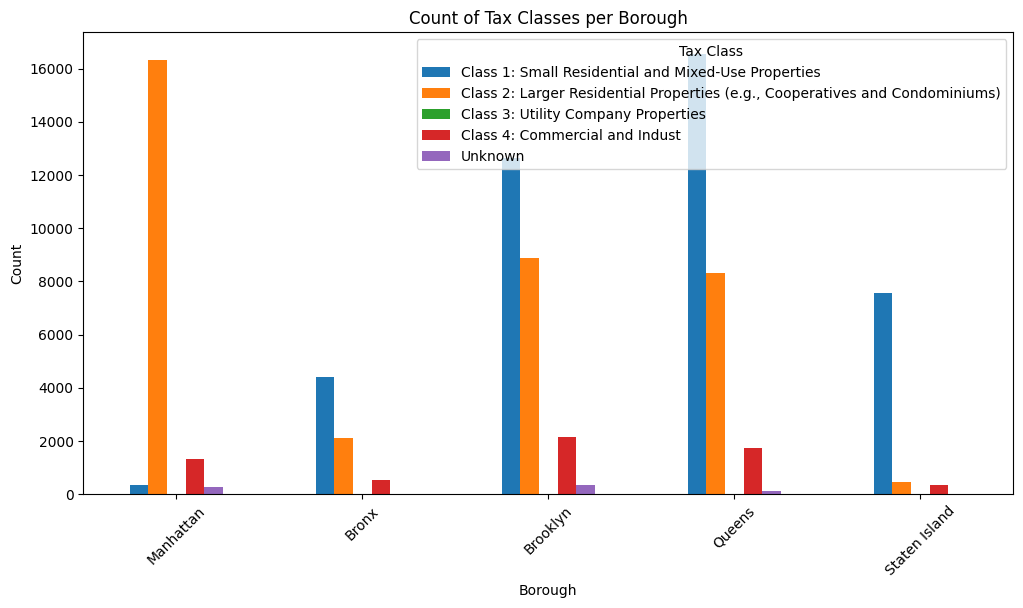

In [79]:
# prompt: using tax class categoriezed column and these values "Class 1: Small Residential and Mixed-Use Properties
# Class 2: Larger Residential Properties (e.g., Cooperatives and Condominiums)
# Class 3: Utility Company Properties
# Class 4: Commercial and Industrial Properties" provide a bar chart with the value count of each class per borough.

# Group by 'BOROUGH' and 'TAX CLASS AT PRESENT_Categorized' and count the occurrences
tax_class_counts = df.groupby(['BOROUGH', 'TAX CLASS AT PRESENT_Categorized'])['TAX CLASS AT PRESENT_Categorized'].count().unstack()

# Create a bar chart
tax_class_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Count of Tax Classes per Borough')
plt.xticks(rotation=45)
plt.legend(title='Tax Class')
plt.show()


Manhatten is third in commerical and industrial properties, although they have they highest median sales price. Queens has the highest amount of residential properties.  

<ipython-input-80-99025f965d4b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_units_by_borough = df.groupby('BOROUGH')['TOTAL UNITS'].sum()


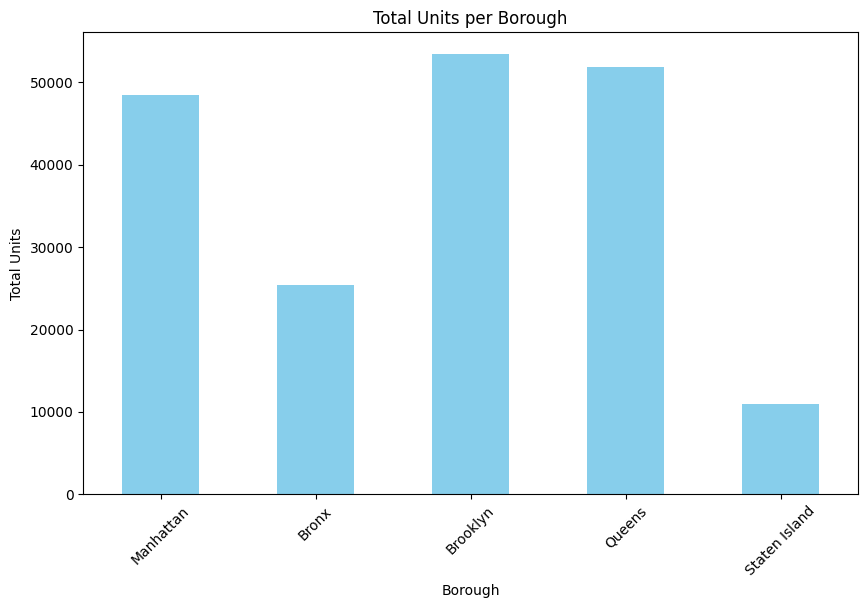

In [80]:
# prompt: make a bar graph with the count of total units per borough. display using a bar graph

# Group by 'BOROUGH' and count the total units
total_units_by_borough = df.groupby('BOROUGH')['TOTAL UNITS'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
total_units_by_borough.plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Total Units')
plt.title('Total Units per Borough')
plt.xticks(rotation=45)
plt.show()


<ipython-input-81-72fc661738ff>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  residential_units_by_borough = df.groupby('BOROUGH')['RESIDENTIAL UNITS'].sum()


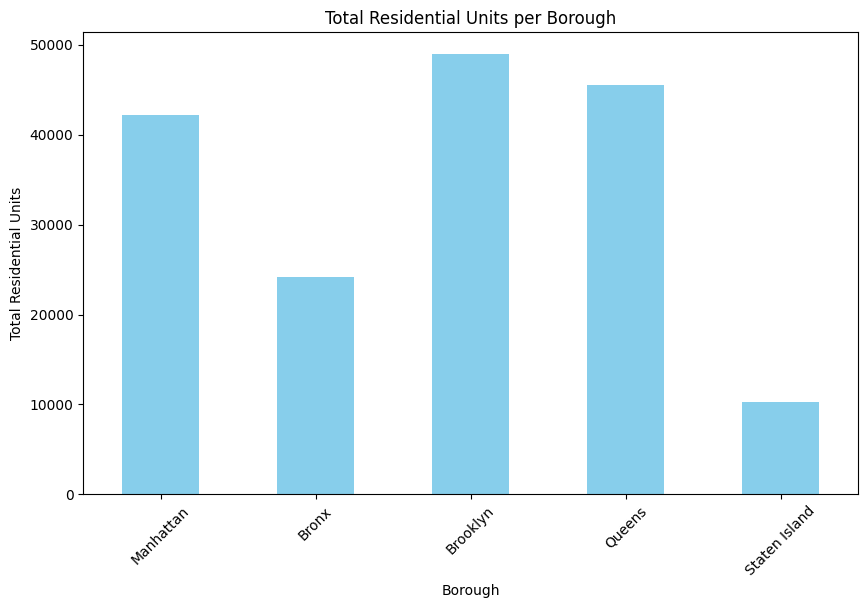

In [81]:
# prompt: display the count of residential units per borough with a bar graph

# Group by 'BOROUGH' and sum the residential units
residential_units_by_borough = df.groupby('BOROUGH')['RESIDENTIAL UNITS'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
residential_units_by_borough.plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Total Residential Units')
plt.title('Total Residential Units per Borough')
plt.xticks(rotation=45)
plt.show()


<ipython-input-82-fa2af5771600>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_gross_sqft_by_borough = df.groupby('BOROUGH')['GROSS SQUARE FEET'].median()


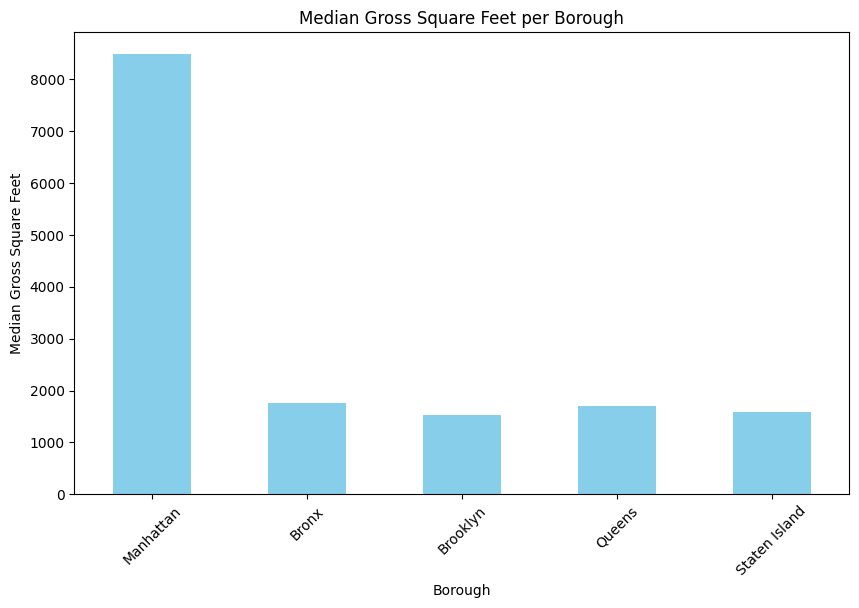

In [82]:
# prompt: generate a bar graph with each boruoghs median gross square feet

# Calculate the median gross square feet per borough
median_gross_sqft_by_borough = df.groupby('BOROUGH')['GROSS SQUARE FEET'].median()

# Create a bar chart
plt.figure(figsize=(10, 6))
median_gross_sqft_by_borough.plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Median Gross Square Feet')
plt.title('Median Gross Square Feet per Borough')
plt.xticks(rotation=45)
plt.show()


<ipython-input-83-59edf5f37c28>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_land_sqft_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].median()


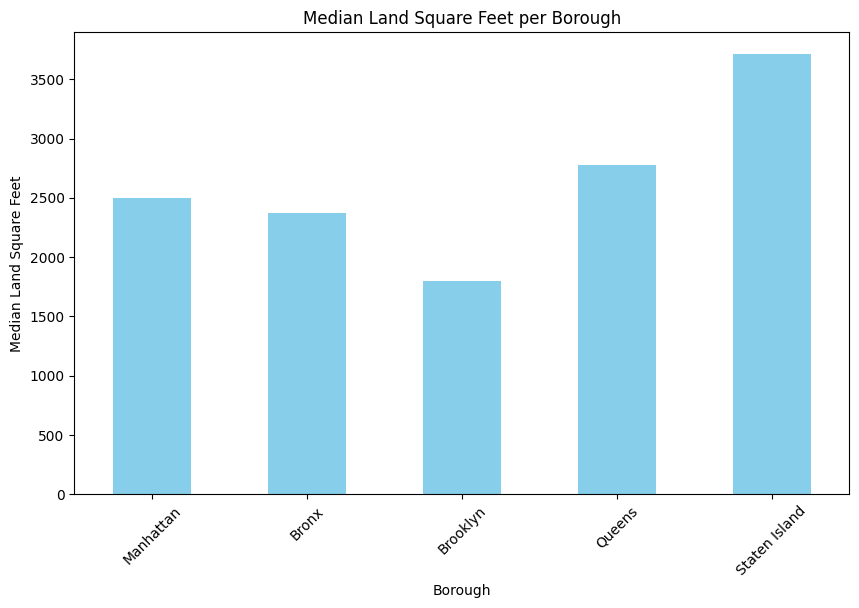

In [83]:
# prompt: # prompt: generate a bar graph with each boruoghs median land square feet

# Calculate the median land square feet per borough
median_land_sqft_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].median()

# Create a bar chart
plt.figure(figsize=(10, 6))
median_land_sqft_by_borough.plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Median Land Square Feet')
plt.title('Median Land Square Feet per Borough')
plt.xticks(rotation=45)
plt.show()


Manhatten potentiall has the most multi storied buildings by these graphs as it has the highest median gross square feet, hyet is third in land square feet.

In [84]:
# prompt: export df as a csv

df.to_csv('nyc-rolling-sales-cleaned.csv', index=False)
